In [1]:
from google.colab import files

files.upload()

Saving test_avsa.csv to test_avsa.csv
Saving train_avsa.csv to train_avsa.csv


{'test_avsa.csv': b'id,tweet\n31963,#studiolife #aislife #requires #passion #dedication #willpower   to find #newmaterials\xc3\xa2\xc2\x80\xc2\xa6 \n31964, @user #white #supremacists want everyone to see the new \xc3\xa2\xc2\x80\xc2\x98  #birds\xc3\xa2\xc2\x80\xc2\x99 #movie \xc3\xa2\xc2\x80\xc2\x94 and here\xc3\xa2\xc2\x80\xc2\x99s why  \n31965,safe ways to heal your #acne!!    #altwaystoheal #healthy   #healing!! \n31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? \xc3\xb0\xc2\x9f\xc2\x98\xc2\x8d\xc3\xb0\xc2\x9f\xc2\x98\xc2\x8d\xc3\xb0\xc2\x9f\xc2\x98\xc2\x8d   #harrypotter #pottermore #favorite"\n31967,"  3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and misses\xc3\xa2\xc2\x80\xc2\xa6 "\n31968,choose to be   :) #momtips \n31969,something inside me dies \xc3\xb0\xc2\x9f\xc2\x92\xc2\xa6\xc3\xb0\xc2\x9f\xc2\x92\xc2\xbf\xc3\xa2\xc2\x9c\xc2\xa8  eyes ness #smokeyeyes #tired  #lonely #sof #grunge\xc3\xa2\xc2\

In [54]:
!pip install scikit-plot

In [0]:
import re
import nltk
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import scikitplot as skplt
from sklearn import metrics
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from nltk.stem.porter import *
from nltk import SnowballStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score 
import gensim
from xgboost import XGBClassifier
pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

In [0]:
train = pd.read_csv('/content/train_avsa.csv')

test = pd.read_csv('/content/test_avsa.csv')

## EDA

In [0]:
train.info()

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
id       31962 non-null int64
label    31962 non-null int64
tweet    31962 non-null object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
id       17197 non-null int64
tweet    17197 non-null object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


In [0]:
# Sample Racist Tweets
train[train['label']==1].head(10)

id  ...                                                                                                                              tweet
13    14  ...                                                         @user #cnn calls #michigan middle school 'build the wall' chant '' #tcot  
14    15  ...                              no comment!  in #australia   #opkillingbay #seashepherd #helpcovedolphins #thecove  #helpcovedolphins
17    18  ...                                                                                                             retweet if you agree! 
23    24  ...                                                                                    @user @user lumpy says i am a . prove it lumpy.
34    35  ...                           it's unbelievable that in the 21st century we'd need something like this. again. #neverump  #xenophobia 
56    57  ...                                                                                            @user lets fight against  #love #peace 
68    69  ...                     ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness  
77    78  ...                                            @user hey, white people: you can call people 'white' by @user  #race  #identity #medâ¦
82    83  ...                                                      how the #altright uses  &amp; insecurity to lure men into #whitesupremacy    
111  112  ...  @user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦

[10 rows x 3 columns]

In [0]:
# Non Racist Tweets
train[train['label']==0].head(10)

id  ...                                                                                                                                            tweet
0   1  ...                                            @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
1   2  ...                       @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
2   3  ...                                                                                                                              bihday your majesty
3   4  ...                                                           #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦  
4   5  ...                                                                                                           factsguide: society now    #motivation
5   6  ...                             [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  
6   7  ...                                                                        @user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7   8  ...  the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams   #hate #imagine #actorslife #revolutionschool #girl
8   9  ...                                                          we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â¦ 
9  10  ...                                                                                                @user @user welcome here !  i'm   it's so #gr8 ! 

[10 rows x 3 columns]

In [0]:
# Class distribution is not equal 
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [0]:
def count_num_words(string):
  words_list = [i for i in string.strip().split(" ") if len(i)>0]
  return len(words_list)

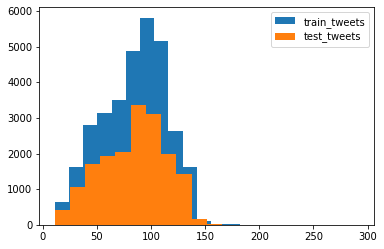

In [0]:
# distribution of length of the tweets, in terms of characters, in both train and test data
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len() 
plt.hist(length_train, bins=20, label="train_tweets") 
plt.hist(length_test, bins=20, label="test_tweets") 
plt.legend() 
plt.show()

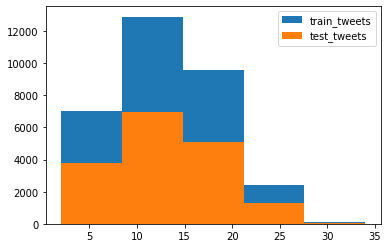

In [0]:
# distribution of length of the tweets, in terms of words, in both train and test data
length_train = train['tweet'].apply(count_num_words)
length_test = test['tweet'].apply(count_num_words)
plt.hist(length_train, bins=5, label="train_tweets") 
plt.hist(length_test, bins=5, label="test_tweets") 
plt.legend() 
plt.show()

### Text Preprocessing

In [4]:
combined = train.append(test , ignore_index=True, sort = False)
combined.shape

(49159, 3)

In [0]:
def remove_unwanted_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt  

def replace_pattern_with_space(input_txt, pattern):
    return re.sub(pattern," ", input_txt)   
    

In [0]:
#print(replace_pattern_with_space('''#model i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦''', "[^a-zA-Z#]")) 

In [6]:
combined["processed_tweet"] = combined["tweet"].apply(remove_unwanted_pattern, pattern = "@[\w]*")
combined.head(5)

id  ...                                                                                                   processed_tweet
0   1  ...                   when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
1   2  ...    thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
2   3  ...                                                                                               bihday your majesty
3   4  ...                            #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦  
4   5  ...                                                                            factsguide: society now    #motivation

[5 rows x 4 columns]

In [7]:
combined["processed_tweet"] = combined["processed_tweet"].apply(replace_pattern_with_space, pattern = "[^a-zA-Z#]")

combined.head(5)

id  ...                                                                                                   processed_tweet
0   1  ...                   when a father is dysfunctional and is so selfish he drags his kids into his dysfunction    #run
1   2  ...    thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx     #disapointed #getthanked
2   3  ...                                                                                               bihday your majesty
3   4  ...                            #model   i love u take with u all the time in ur                                      
4   5  ...                                                                            factsguide  society now    #motivation

[5 rows x 4 columns]

In [8]:
# After observing a variety of tweets, threshold length value for word is set to greaterthan to to prevent words like "hot", "sex" from getting deleted.
combined["processed_tweet"] = combined["processed_tweet"].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

combined.head(5)

id  ...                                                                                    processed_tweet
0   1  ...                     when father dysfunctional and selfish drags his kids into his dysfunction #run
1   2  ...  thanks for #lyft credit can use cause they don offer wheelchair vans pdx #disapointed #getthanked
2   3  ...                                                                                bihday your majesty
3   4  ...                                                                 #model love take with all the time
4   5  ...                                                                 factsguide society now #motivation

[5 rows x 4 columns]

In [9]:
combined["tokenized_tweet"] = combined["processed_tweet"].apply(lambda x: x.split())

combined.head(5)

id  ...                                                                                                    tokenized_tweet
0   1  ...                        [when, father, dysfunctional, and, selfish, drags, his, kids, into, his, dysfunction, #run]
1   2  ...  [thanks, for, #lyft, credit, can, use, cause, they, don, offer, wheelchair, vans, pdx, #disapointed, #getthanked]
2   3  ...                                                                                            [bihday, your, majesty]
3   4  ...                                                                         [#model, love, take, with, all, the, time]
4   5  ...                                                                            [factsguide, society, now, #motivation]

[5 rows x 5 columns]

###Normalizing the tokenized tweets.

In [12]:
stemmer = SnowballStemmer(language="english", ignore_stopwords=False) 

combined["tokenized_tweet"] = combined["tokenized_tweet"].apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

combined.head(10)

id  ...                                                                                                                                 tokenized_tweet
0   1  ...                                                               [when, father, dysfunct, and, selfish, drag, his, kid, into, his, dysfunct, #run]
1   2  ...                                      [thank, for, #lyft, credit, can, use, caus, they, don, offer, wheelchair, van, pdx, #disapoint, #getthank]
2   3  ...                                                                                                                         [bihday, your, majesti]
3   4  ...                                                                                                      [#model, love, take, with, all, the, time]
4   5  ...                                                                                                               [factsguid, societi, now, #motiv]
5   6  ...                           [huge, fan, fare, and, big, talk, befor, they, leav, chao, and, pay, disput, when, they, get, there, #allshowandnogo]
6   7  ...                                                                                                                         [camp, tomorrow, danni]
7   8  ...  [the, next, school, year, the, year, for, exam, can, think, about, that, #school, #exam, #hate, #imagin, #actorslif, #revolutionschool, #girl]
8   9  ...                                                                   [won, love, the, land, #allin, #cav, #champion, #cleveland, #clevelandcavali]
9  10  ...                                                                                                                             [welcom, here, #gr]

[10 rows x 5 columns]

In [0]:
def join_tokens(input_list):
  return ' '.join(input_list)

In [14]:
combined["tokenized_tweet"] = combined["tokenized_tweet"].apply(join_tokens)

combined.head(10)

id  ...                                                                                                             tokenized_tweet
0   1  ...                                                        when father dysfunct and selfish drag his kid into his dysfunct #run
1   2  ...                                  thank for #lyft credit can use caus they don offer wheelchair van pdx #disapoint #getthank
2   3  ...                                                                                                         bihday your majesti
3   4  ...                                                                                          #model love take with all the time
4   5  ...                                                                                                factsguid societi now #motiv
5   6  ...                          huge fan fare and big talk befor they leav chao and pay disput when they get there #allshowandnogo
6   7  ...                                                                                                         camp tomorrow danni
7   8  ...  the next school year the year for exam can think about that #school #exam #hate #imagin #actorslif #revolutionschool #girl
8   9  ...                                                         won love the land #allin #cav #champion #cleveland #clevelandcavali
9  10  ...                                                                                                             welcom here #gr

[10 rows x 5 columns]

In [0]:
all_words = ' '.join([text for text in combined["tokenized_tweet"]])

### Word cloud for all tweets 

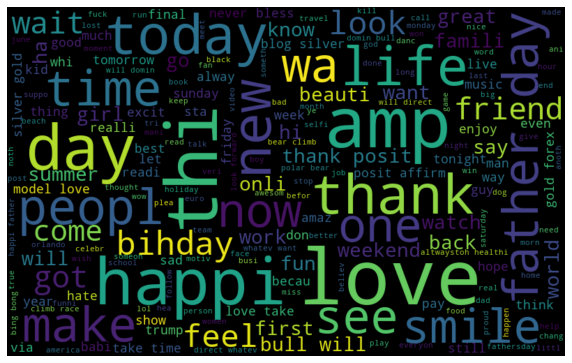

In [0]:
# Using word cloud to check which type of words are more frequent than others.
wordcloud = WordCloud(width=800, height=500, random_state=43, max_font_size=110).generate(all_words) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

### Word cloud for positive (non racist/sexist) tweets 

In [0]:
all_pos_words = ' '.join([text for text in combined[combined["label"]==0]["tokenized_tweet"]])

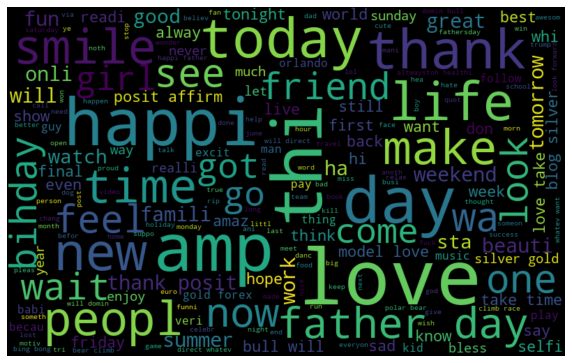

In [0]:
# Using word cloud to check which type of words are more frequent than others.
wordcloud = WordCloud(width=800, height=500, random_state=43, max_font_size=110).generate(all_pos_words) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

### Word cloud for negative (racist/sexist) tweets 

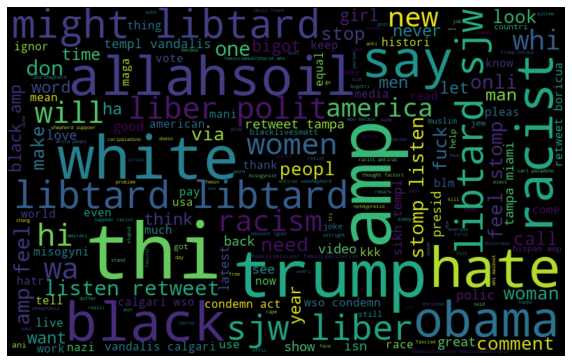

In [0]:
all_neg_words = ' '.join([text for text in combined[combined["label"]==1]["tokenized_tweet"]])

# Using word cloud to check which type of words are more frequent than others.
wordcloud = WordCloud(width=800, height=500, random_state=43, max_font_size=110).generate(all_neg_words) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [0]:
def extract_hashtags(input_txt):
  return re.findall("#(\w+)", input_txt)

In [0]:
combined["hashtags"] = combined["tokenized_tweet"].apply(extract_hashtags)

combined.head(10)

id  ...                                                         hashtags
0   1  ...                                                            [run]
1   2  ...                                      [lyft, disapoint, getthank]
2   3  ...                                                               []
3   4  ...                                                          [model]
4   5  ...                                                          [motiv]
5   6  ...                                                 [allshowandnogo]
6   7  ...                                                               []
7   8  ...  [school, exam, hate, imagin, actorslif, revolutionschool, girl]
8   9  ...               [allin, cav, champion, cleveland, clevelandcavali]
9  10  ...                                                             [gr]

[10 rows x 6 columns]

In [0]:
pos_tags = combined[combined["label"]==0]["hashtags"]
neg_tags = combined[combined["label"]==1]["hashtags"]

In [0]:
pos_list = []
neg_list = []

for i in pos_tags:
  for j in i:
    pos_list.append(j)

for i in neg_tags:
  for j in i:
    neg_list.append(j)    

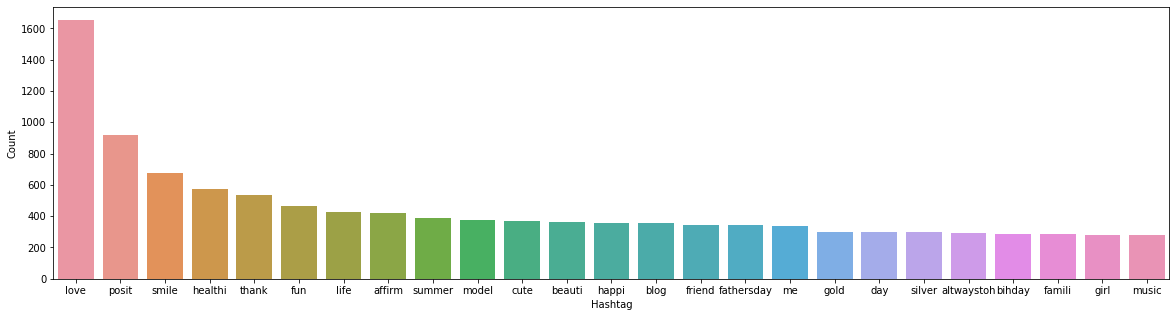

In [0]:
# Analyis on positive tags

pos_dict = nltk.FreqDist(pos_list)
pos_df = pd.DataFrame({'Hashtag': list(pos_dict.keys()), 'Count': list(pos_dict.values())})

# selecting top 25 most frequent hashtags     
pos_df = pos_df.nlargest(columns="Count", n = 25) 
plt.figure(figsize=(20,5)) 
ax = sns.barplot(data=pos_df, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count') 
plt.show()

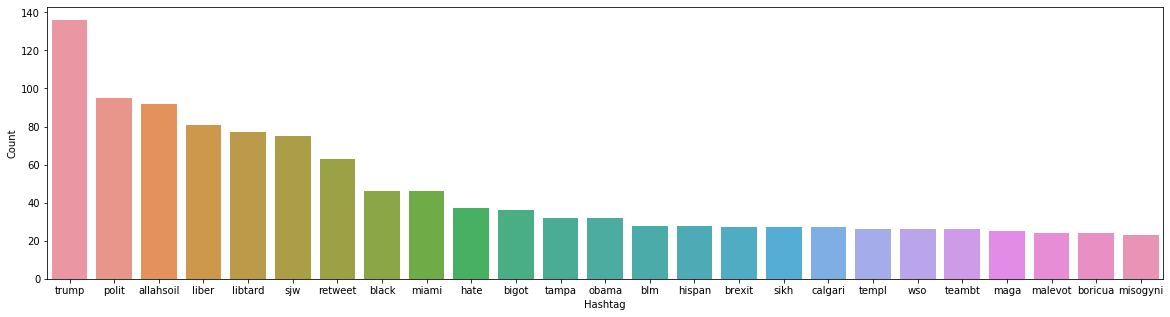

In [0]:
# Analyis on negative tags

neg_dict = nltk.FreqDist(neg_list)
neg_df = pd.DataFrame({'Hashtag': list(neg_dict.keys()), 'Count': list(neg_dict.values())})

# selecting top 25 most frequent hashtags     
neg_df = neg_df.nlargest(columns="Count", n = 25) 
plt.figure(figsize=(20,5)) 
ax = sns.barplot(data=neg_df, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count') 
plt.show()

### Creating Bag-of-Words Features

In [0]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
bow = bow_vectorizer.fit_transform(combined['processed_tweet']) 
bow.shape

# Extracting train and test BoW features 
train_bow = bow[:31962,:] 
test_bow = bow[31962:,:] 
# splitting data into training and validation set 
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.25)

### Creating TF-IDF Features

TF = (Number of times term t appears in a document)/(Number of terms in the document)

IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.

TF-IDF = TF*IDF

In [0]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
tfidf = tfidf_vectorizer.fit_transform(combined['processed_tweet']) 
tfidf.shape


train_tfidf = tfidf[:31962,:] 
test_tfidf = tfidf[31962:,:] 
xtrain_tfidf = train_tfidf[ytrain.index] 
xvalid_tfidf = train_tfidf[yvalid.index]

### Creating custom Word2Vec Features

In [0]:
tokenized_tweet = combined['processed_tweet'].apply(lambda x: x.split()) # tokenizing 

In [51]:
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=250, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 42)

model_w2v.train(tokenized_tweet, total_examples= len(combined['processed_tweet']), epochs=100)

(39510844, 48136000)

In [0]:
model_w2v.wv.most_similar(positive="black")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('colts', 0.4409199059009552),
 ('#datacosmology', 0.3980475068092346),
 ('presiding', 0.39650124311447144),
 ('sexest', 0.39120906591415405),
 ('indianapolis', 0.38818785548210144),
 ('abeed', 0.3881330192089081),
 ('#philandocastile', 0.3875293731689453),
 ('white', 0.3864237070083618),
 ('mamba', 0.3801681399345398),
 ('#bitches', 0.3691920042037964)]

In [0]:
model_w2v.wv.most_similar(positive="gender")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('toilets', 0.4536789655685425),
 ('#fe', 0.44260868430137634),
 ('natasha', 0.424263060092926),
 ('bisexual', 0.42329081892967224),
 ('#parenthood', 0.4090813994407654),
 ('firearm', 0.3970094919204712),
 ('democrat', 0.3923702538013458),
 ('surrendered', 0.39162856340408325),
 ('prospect', 0.38874247670173645),
 ('tue', 0.38227301836013794)]

#### Model uses cosine similarity to find out the most similar vectors (words)

In [0]:
model_w2v['food']
len(model_w2v['food'])

250

Since our data contains tweets and not just words, we’ll have to figure out a way to use the word vectors from word2vec model to create vector representation for an entire tweet. There is a simple solution to this problem, we can simply take mean of all the word vectors present in the tweet. The length of the resultant vector will be the same, i.e. 250. We will repeat the same process for all the tweets in our data and obtain their vectors. Now we have 250 word2vec features for our data.

In [0]:
def word_vector(tokens, size):
  vec = np.zeros(size).reshape((1, size))
  count = 0.
  for word in tokens:
    try:
      vec += model_w2v[word].reshape((1, size))
      count += 1.
    except KeyError: # handling the case where the token is not in vocabulary   
     continue
  if count != 0:
      vec /= count
  return vec

In [53]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 250)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 250)

wordvec_df = pd.DataFrame(wordvec_arrays) 
wordvec_df.shape 

(49159, 250)

In [0]:
wordvec_df.head()

0         1         2    ...       247       248       249
0 -0.006865  0.032482  0.080122  ... -0.035651  0.138266 -0.231029
1  0.312141  0.137559  0.028264  ... -0.271429  0.003591 -0.075719
2  0.377203  0.119671  0.065214  ...  0.435655 -0.156334 -0.116267
3  0.211178  0.069595  0.075254  ... -0.024180  0.307512 -0.195207
4 -0.050513  0.250044  0.166883  ... -0.023183  0.163468 -0.543519

[5 rows x 250 columns]

### Creating custom Doc2Vec Features


In [0]:
from tqdm import tqdm 
#tqdm.pandas(desc="progress-bar") 
from gensim.models.doc2vec import LabeledSentence

#### To implement doc2vec, we have to labelise or tag each tokenised tweet with unique IDs. We can do so by using Gensim’s LabeledSentence() function.

In [0]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output
labeled_tweets = add_label(tokenized_tweet) # label all the tweets

In [25]:
labeled_tweets[:5]

[LabeledSentence(words=['when', 'father', 'dysfunctional', 'and', 'selfish', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction', '#run'], tags=['tweet_0']),
 LabeledSentence(words=['thanks', 'for', '#lyft', 'credit', 'can', 'use', 'cause', 'they', 'don', 'offer', 'wheelchair', 'vans', 'pdx', '#disapointed', '#getthanked'], tags=['tweet_1']),
 LabeledSentence(words=['bihday', 'your', 'majesty'], tags=['tweet_2']),
 LabeledSentence(words=['#model', 'love', 'take', 'with', 'all', 'the', 'time'], tags=['tweet_3']),
 LabeledSentence(words=['factsguide', 'society', 'now', '#motivation'], tags=['tweet_4'])]

In [28]:
model_d2v = gensim.models.Doc2Vec(dm=1,  # dm = 1 for ‘distributed memory’ model                                 
                                 dm_mean=1, # dm = 1 for using mean of the context word vectors    
                                  size=250,                                  
window=5, # width of the context window                                  
negative=7, # if > 0 then negative sampling will be used                                 
min_count=5, # Ignores all words with total frequency lower than 2.                                  
workers=3, # no. of cores                                  
alpha=0.1, # learning rate                                  
seed = 42) 
model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])
model_d2v.train(labeled_tweets, total_examples= len(combined['processed_tweet']), epochs=20)

/usr/local/lib/python3.6/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|██████████| 49159/49159 [00:00<00:00, 1748287.56it/s]


In [29]:
docvec_arrays = np.zeros((len(tokenized_tweet), 250)) 
for i in range(len(combined)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,250))    

docvec_df = pd.DataFrame(docvec_arrays) 
docvec_df.shape

(49159, 250)

In [31]:
docvec_df.head(3)

0         1         2    ...       247       248       249
0 -0.246393 -1.021546 -0.500146  ...  0.159940 -0.496883 -0.567626
1 -0.668939  0.191135  0.081896  ...  0.109167 -0.207035 -0.007016
2  0.048056 -0.282830 -0.077525  ... -0.012405 -0.102296  0.114204

[3 rows x 250 columns]

### Logistic Regression

#### Bow features

In [0]:
lreg = LogisticRegression() 
# training the model 
lreg.fit(xtrain_bow, ytrain) 
prediction = lreg.predict_proba(xvalid_bow) 

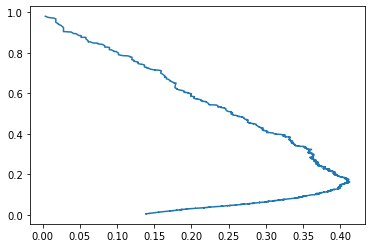

In [112]:
'''
ROC curves should be used when there are roughly equal numbers of observations for each class.
Precision-Recall curves should be used when there is a moderate to large class imbalance.
'''

precision, recall, thresholds = metrics.precision_recall_curve(yvalid, prediction[:,1])
f1 = 2*(precision*recall)/(precision + recall)
plt.plot(f1[:-1], thresholds)
plt.show()

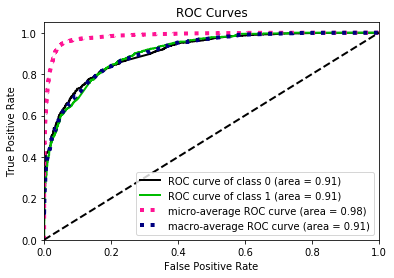

In [70]:
skplt.metrics.plot_roc(yvalid, prediction)
plt.show()

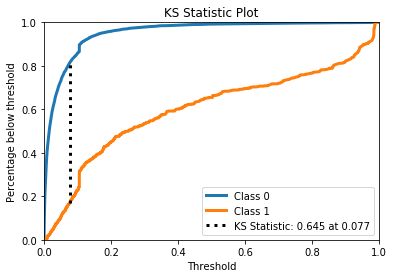

In [86]:
skplt.metrics.plot_ks_statistic(yvalid, prediction)
plt.show()

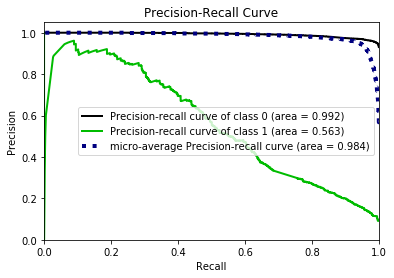

In [88]:
skplt.metrics.plot_precision_recall(yvalid, prediction)
plt.show()

In [81]:
# predicting on the validation set 
prediction_int = prediction[:,1] >= 0.3 
# if prediction is greater than or equal to 0.3 than 1 else 0 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int) 
# calculating f1 score for the validation set

0.5322415557830092

In [0]:
# Creating submissoion file
test_pred = lreg.predict_proba(test_bow) 
test_pred_int = test_pred[:,1] >= 0.3 
test_pred_int = test_pred_int.astype(np.int) 
test['label'] = test_pred_int 
submission = test[['id','label']] 
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

#### TF-IDF features

In [0]:
lreg.fit(xtrain_tfidf, ytrain) 
prediction = lreg.predict_proba(xvalid_tfidf) 

In [91]:
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int) # calculating f1 score for the validation set

0.5260915867944622

#### Word2vec features

In [128]:
train_w2v = wordvec_df.iloc[:31962,:] 
test_w2v = wordvec_df.iloc[31962:,:] 
xtrain_w2v = train_w2v.iloc[ytrain.index,:] 
xvalid_w2v = train_w2v.iloc[yvalid.index,:]
lreg.fit(xtrain_w2v, ytrain) 
prediction = lreg.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.38
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.6383799421407907

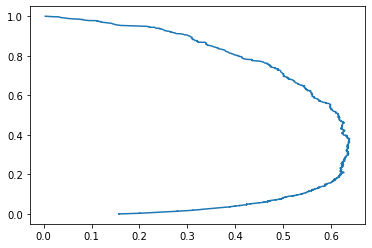

In [114]:
precision, recall, thresholds = metrics.precision_recall_curve(yvalid, prediction[:,1])
f1 = 2*(precision*recall)/(precision + recall)
plt.plot(f1[:-1], thresholds)
plt.show()

In [0]:
# Creating submissoion file
test_pred = lreg.predict_proba(test_w2v) 
test_pred_int = test_pred[:,1] >= 0.38 
test_pred_int = test_pred_int.astype(np.int) 
test['label'] = test_pred_int 
submission = test[['id','label']] 
submission.to_csv('sub_lreg_wrod2vec_38th.csv', index=False) # writing data to a CSV file

#### Doc2vec features

In [98]:
train_d2v = docvec_df.iloc[:31962,:] 
test_d2v = docvec_df.iloc[31962:,:] 
xtrain_d2v = train_d2v.iloc[ytrain.index,:] 
xvalid_d2v = train_d2v.iloc[yvalid.index,:]
lreg.fit(xtrain_d2v, ytrain) 
prediction = lreg.predict_proba(xvalid_d2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.36108108108108106

### SVM

#### word2vec

In [134]:
svc = svm.SVC(kernel='rbf', C=1, probability=True).fit(xtrain_w2v, ytrain) 
prediction = svc.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.6982024597918637

In [156]:
svc = svm.SVC(kernel='poly', C=1, probability=True).fit(xtrain_w2v, ytrain) 
prediction = svc.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.667342799188641

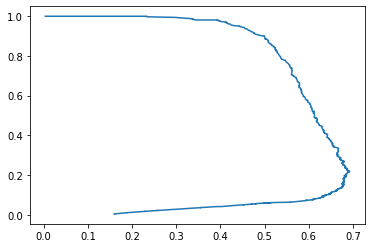

In [157]:
precision, recall, thresholds = metrics.precision_recall_curve(yvalid, prediction[:,1])
f1 = 2*(precision*recall)/(precision + recall)
plt.plot(f1[:-1], thresholds)
plt.show()

In [0]:
# Creating submissoion file
test_pred = svc.predict_proba(test_w2v) 
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int) 
test['label'] = test_pred_int 
submission = test[['id','label']] 
submission.to_csv('sub_svm_word2vec28.csv', index=False) # writing data to a CSV file

### Naive Bayes

#### word2vec

In [139]:
clf = GaussianNB()
clf.fit(xtrain_w2v, ytrain)
prediction = clf.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.46821705426356586

### XGBOOST

#### word2vec

In [159]:
xgb = XGBClassifier(max_depth=5, n_estimators=1000, nthread= 3).fit(xtrain_w2v, ytrain) 
prediction = xgb.predict(xvalid_w2v) 
f1_score(yvalid, prediction)

0.6777408637873755

In [0]:
import xgboost as xgb

##### parameter tuning

In [162]:
dtrain = xgb.DMatrix(xtrain_w2v, label=ytrain) 
dvalid = xgb.DMatrix(xvalid_w2v, label=yvalid) 
dtest = xgb.DMatrix(test_w2v)

# Parameters that we are going to tune 
params = {
    'objective':'binary:logistic',
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1
 }

def custom_eval(preds, dtrain):
    labels = dtrain.get_label().astype(np.int)
    preds = (preds >= 0.3).astype(np.int)
    return [('f1_score', f1_score(labels, preds))]

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


##### Tuning max_depth and min_child_weight

In [164]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(6,10)
     for min_child_weight in range(5,8)
 ]

max_f1 = 0. # initializing with 0 
best_params = None 
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
     # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight

     # Cross-validation
    cv_results = xgb.cv(params,
        dtrain,feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=42,
        nfold=5,
        early_stopping_rounds=10
    )     
    # Finding best F1 Score 
    mean_f1 = cv_results['test-f1_score-mean'].max()
        
    boost_rounds = cv_results['test-f1_score-mean'].argmax()    
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))    
    if mean_f1 > max_f1:
            max_f1 = mean_f1
            best_params = (max_depth,min_child_weight) 

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

CV with max_depth=6, min_child_weight=5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


	F1 Score 0.6688898 for 56 rounds
CV with max_depth=6, min_child_weight=6
	F1 Score 0.6683074 for 71 rounds
CV with max_depth=6, min_child_weight=7
	F1 Score 0.6638656000000001 for 68 rounds
CV with max_depth=7, min_child_weight=5
	F1 Score 0.6767920000000001 for 80 rounds
CV with max_depth=7, min_child_weight=6
	F1 Score 0.6686944 for 75 rounds
CV with max_depth=7, min_child_weight=7
	F1 Score 0.666323 for 45 rounds
CV with max_depth=8, min_child_weight=5
	F1 Score 0.658177 for 44 rounds
CV with max_depth=8, min_child_weight=6
	F1 Score 0.6649916 for 47 rounds
CV with max_depth=8, min_child_weight=7
	F1 Score 0.6623433999999999 for 40 rounds
CV with max_depth=9, min_child_weight=5
	F1 Score 0.6583 for 45 rounds
CV with max_depth=9, min_child_weight=6
	F1 Score 0.662031 for 27 rounds
CV with max_depth=9, min_child_weight=7
	F1 Score 0.674085 for 98 rounds
Best params: 7, 5, F1 Score: 0.6767920000000001


In [0]:
params['max_depth'] = 7
params['min_child_weight'] = 5

##### Tuning subsample and colsample

In [167]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(5,10)]
    for colsample in [i/10. for i in range(5,10)] ]
max_f1 = 0. 
best_params = None 
for subsample, colsample in gridsearch_params:
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
     # Update our parameters
    params['colsample'] = colsample
    params['subsample'] = subsample
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=42,
        nfold=5,
        early_stopping_rounds=10
    )
     # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = np.argmax(np.array(cv_results['test-f1_score-mean']))
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (subsample, colsample) 

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

CV with subsample=0.5, colsample=0.5
	F1 Score 0.6338576 for 35 rounds
CV with subsample=0.5, colsample=0.6
	F1 Score 0.6338576 for 35 rounds
CV with subsample=0.5, colsample=0.7
	F1 Score 0.6338576 for 35 rounds
CV with subsample=0.5, colsample=0.8
	F1 Score 0.6338576 for 35 rounds
CV with subsample=0.5, colsample=0.9
	F1 Score 0.6338576 for 35 rounds
CV with subsample=0.6, colsample=0.5
	F1 Score 0.6678304 for 91 rounds
CV with subsample=0.6, colsample=0.6
	F1 Score 0.6678304 for 91 rounds
CV with subsample=0.6, colsample=0.7
	F1 Score 0.6678304 for 91 rounds
CV with subsample=0.6, colsample=0.8
	F1 Score 0.6678304 for 91 rounds
CV with subsample=0.6, colsample=0.9
	F1 Score 0.6678304 for 91 rounds
CV with subsample=0.7, colsample=0.5
	F1 Score 0.673995 for 62 rounds
CV with subsample=0.7, colsample=0.6
	F1 Score 0.673995 for 62 rounds
CV with subsample=0.7, colsample=0.7
	F1 Score 0.673995 for 62 rounds
CV with subsample=0.7, colsample=0.8
	F1 Score 0.673995 for 62 rounds
CV with su

In [0]:
params['colsample'] = 0.7
params['subsample'] = 0.5

##### tuning the learning rate.

In [170]:
max_f1 = 0. 
best_params = None 
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
     # Update ETA
    params['eta'] = eta

     # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=500,
        maximize=True,
        seed=42,
        nfold=5,
        early_stopping_rounds=15
    )

     # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = eta 
print("Best params: {}, F1 Score: {}".format(best_params, max_f1))

CV with eta=0.3


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


	F1 Score 0.6338576 for 35 rounds
CV with eta=0.2
	F1 Score 0.6762978000000001 for 113 rounds
CV with eta=0.1
	F1 Score 0.6801172 for 136 rounds
CV with eta=0.05
	F1 Score 0.6874148 for 235 rounds
CV with eta=0.01
	F1 Score 0.13120300000000001 for 0 rounds
CV with eta=0.005
	F1 Score 0.13120300000000001 for 0 rounds
Best params: 0.05, F1 Score: 0.6874148


In [171]:
best_params = {'colsample': 0.7,'eta': 0.05,
 'max_depth': 7, 'min_child_weight': 5,
 'objective': 'binary:logistic',
 'subsample': 0.5}

xgb_model = xgb.train(
    best_params,
    dtrain,
    feval= custom_eval,
    num_boost_round= 2000,
    maximize=True,
    evals=[(dvalid, "Validation")],
    early_stopping_rounds=20
 ) 

[0]	Validation-error:0.067201	Validation-f1_score:0.13076
Multiple eval metrics have been passed: 'Validation-f1_score' will be used for early stopping.

Will train until Validation-f1_score hasn't improved in 20 rounds.
[1]	Validation-error:0.058566	Validation-f1_score:0.13076
[2]	Validation-error:0.056939	Validation-f1_score:0.13076
[3]	Validation-error:0.056814	Validation-f1_score:0.13076
[4]	Validation-error:0.056438	Validation-f1_score:0.13076
[5]	Validation-error:0.056689	Validation-f1_score:0.13076
[6]	Validation-error:0.056438	Validation-f1_score:0.13076
[7]	Validation-error:0.056814	Validation-f1_score:0.13076
[8]	Validation-error:0.056939	Validation-f1_score:0.13076
[9]	Validation-error:0.056313	Validation-f1_score:0.13076
[10]	Validation-error:0.056564	Validation-f1_score:0.258911
[11]	Validation-error:0.056438	Validation-f1_score:0.336475
[12]	Validation-error:0.055563	Validation-f1_score:0.392718
[13]	Validation-error:0.055938	Validation-f1_score:0.440866
[14]	Validation-e

In [195]:
prediction = xgb_model.predict(dvalid)
prediction_int = prediction >= 0.22 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.6861848124428179

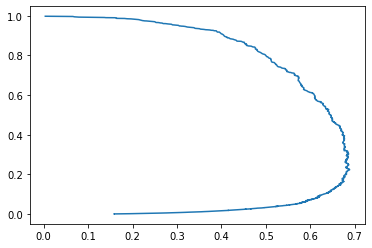

In [175]:
prediction = xgb_model.predict(dvalid)
precision, recall, thresholds = metrics.precision_recall_curve(yvalid, prediction)
f1 = 2*(precision*recall)/(precision + recall)
plt.plot(f1[:-1], thresholds)
plt.show()

In [0]:
test_pred = xgb_model.predict(dtest) 
test['label'] = (test_pred >= 0.22).astype(np.int) 
submission = test[['id','label']] 
submission.to_csv('sub_xgb_w2v_finetuned22.csv', index=False)

#### Future Works


Try model ensembling.

Use Parts-of-Speech tagging to create new features.

Use stemming and/or lemmatization. It might help in getting rid of unnecessary words.

Use bi-grams or tri-grams (tokens of 2 or 3 words respectively) for Bag-of-Words and TF-IDF.

We can give pretrained word-embeddings models a try.